In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data description

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('data/BostonHousingData.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

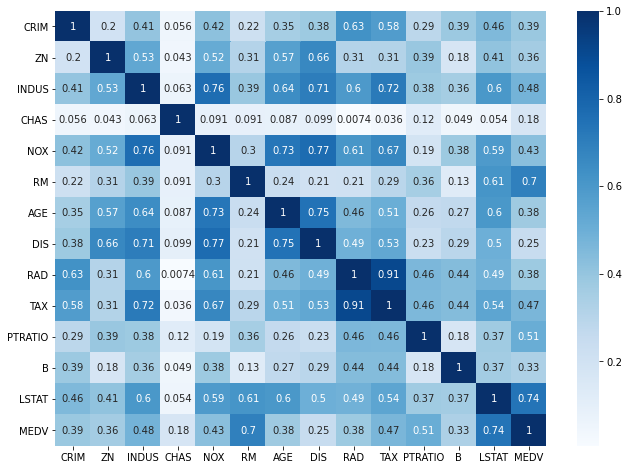

In [5]:
plt.figure(figsize= (11,8))
sns.heatmap(df.corr().abs() , cmap = 'Blues', annot = True)

# MEDV is the target column 
## MEDV is highly correlated with LSTAT and RM

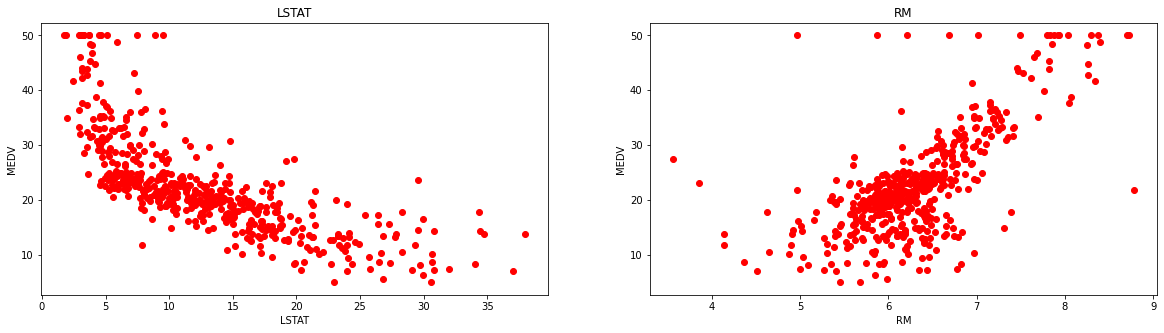

In [6]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o' , color = 'r')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Using Libraries

In [7]:
df2 = df.copy()

In [8]:
X = pd.DataFrame(np.c_[df2['LSTAT'], df2['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

In [9]:
# splits the training and test data set in 80% : 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [10]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [11]:
y_test_predict = lin_model.predict(X_test)

In [12]:
rmse = np.sqrt(mean_squared_error(Y_test,y_test_predict))

In [13]:
y_test_predict[:5]

array([37.38999403, 29.79290611, 25.86755297,  0.31370828, 33.31385559])

In [14]:
Y_test[:5]

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
Name: MEDV, dtype: float64

In [15]:
print('RMSE is {}'.format(rmse))

RMSE is 5.137400784702911


Text(0, 0.5, 'Predicted value')

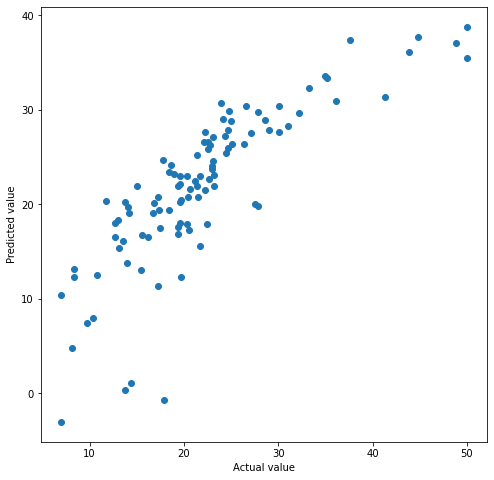

In [16]:
# Scatter plot Actual Value vs Predicted value
plt.figure(figsize= (8,8))
plt.scatter(Y_test, y_test_predict)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

In [17]:
# plt.figure(figsize = (8,8))
# plt.scatter(X_test , Y_test)
# plt.plot(X_test , y_test_pred , color = 'r')
# plt.xlabel('Standardized dependent variable' , fontsize = 16)
# plt.ylabel('Standardized MEDV', fontsize = 16)
# plt.text(1,2,'Line indicates predicted value \n RMSE = 0.66', fontsize = 16)

# Manual method

In [36]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [44]:
cols = ['LSTAT' , 'RM', 'MEDV']
df[cols].describe()

,LSTAT,RM,MEDV
count,506.000000,506.000000,506.000000
mean,12.653063,6.284634,22.532806
std,7.141062,0.702617,9.197104
min,1.730000,3.561000,5.000000
25%,6.950000,5.885500,17.025000
50%,11.360000,6.208500,21.200000
75%,16.955000,6.623500,25.000000
max,37.970000,8.780000,50.000000


In [18]:
# Declaring dependent and independent variable
n = len(df['MEDV'])
x0 = np.ones(n)
x1 = df['LSTAT']
x2 = df['RM']
x = np.array([x0,x1,x2]).T
y = np.array(df['MEDV'])
B = np.zeros(3)

In [19]:
# standardizing independent variables
std = StandardScaler()
#x = std.fit_transform(x)

In [20]:
x[:5]

array([[1.   , 4.98 , 6.575],
       [1.   , 9.14 , 6.421],
       [1.   , 4.03 , 7.185],
       [1.   , 2.94 , 6.998],
       [1.   , 5.33 , 7.147]])

In [21]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [22]:
y.shape

(506,)

In [23]:
# reshaping y
y = y.reshape(y.shape[0],1)
y.shape

(506, 1)

In [24]:
# reshaping B
B = B.reshape(B.shape[0],1)
B.shape

(3, 1)

In [25]:
# standardizing dependent variable
#y = std.fit_transform(y)
y[:5]

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2]])

In [26]:
# defining cost function
def cost_function(x,y,B):
    h = np.sum((x.dot(B) - y) ** 2 ) / (2*n)
    return h

In [27]:
cost_function(x,y,B)

296.0734584980237

In [28]:
def gradient_descent(x,y,B,epoch,alpha):
    cost_history = [0] * epoch
    
    for i in range(epoch):
        y_pred = x.dot(B)
        loss = y_pred - y
        gradient = x.T.dot(loss) / n
        B = B - alpha * gradient
        cost_history[i] = cost_function(x,y,B)
        
    return cost_history, B

In [29]:
cost , b = gradient_descent(x,y,B,100,0.001)

In [30]:
# coefficient values
b

array([[ 0.46175962],
       [-0.09029379],
       [ 3.35187706]])

In [31]:
# independent variable values
x[:5]

array([[1.   , 4.98 , 6.575],
       [1.   , 9.14 , 6.421],
       [1.   , 4.03 , 7.185],
       [1.   , 2.94 , 6.998],
       [1.   , 5.33 , 7.147]])

In [42]:
# Predicted values
y_pred = np.dot(x,b)

y_pred[:5]

array([[22.05068824],
       [21.158877  ],
       [24.18111234],
       [23.65273157],
       [23.93635909]])

# Predicting values for user entered features

In [48]:
lstat = float(input('Enter LSTAT value (lower status of the population (percent)) : '))
rm = float(input('Enter RM value (average number of rooms per dwelling) :  '))

Enter LSTAT value (lower status of the population (percent)) : 25
Enter RM value (average number of rooms per dwelling) :  4


In [49]:
lst = [1,lstat ,rm]
r = np.array(lst)
ans = np.dot(r,b)
print('Predicted value of median value of owner-occupied homes in \$1000s : ' ,ans)

Predicted value of median value of owner-occupied homes in \$1000s :  [11.61192312]
